In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage
import sys

In [2]:
voltajes= [0.016,0.018,0.020,0.022,0.024,0.026,0.028,0.030,0.035,0.040,0.045,0]
print(voltajes)

[0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.035, 0.04, 0.045, 0]


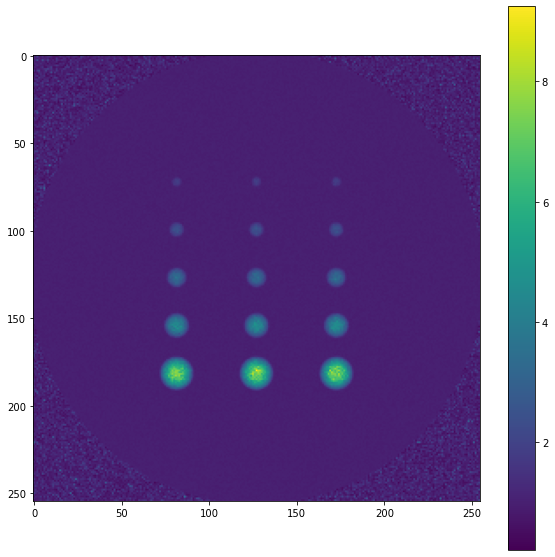

In [12]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-0-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis = ct_scans[0]
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase100-0-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0]

imagen_GATE_dosisCorregida= imagen_GATE_dosisBase/imagen_GATE_dosis
#imagen_GATE_dosisCorregida= imagen_GATE_dosisCorregida/np.max(imagen_GATE_dosisCorregida)

fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosisCorregida,cmap='viridis')
plt.colorbar()

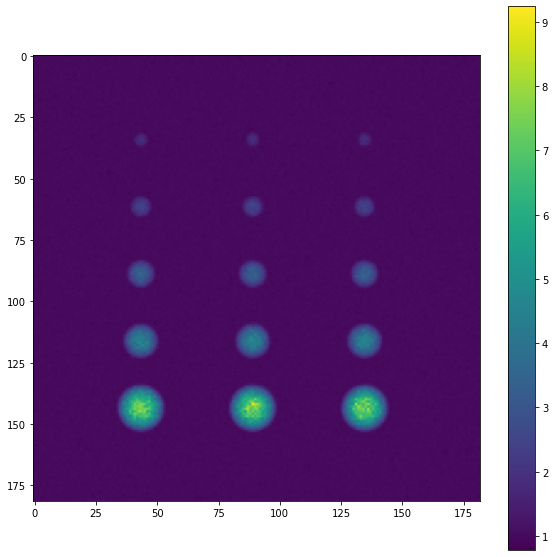

In [13]:
#Separar la parte de adentro del ciruclo
fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosisCorregida[38:220, 38:220],cmap='viridis')
plt.colorbar()
plt.savefig('recortada')

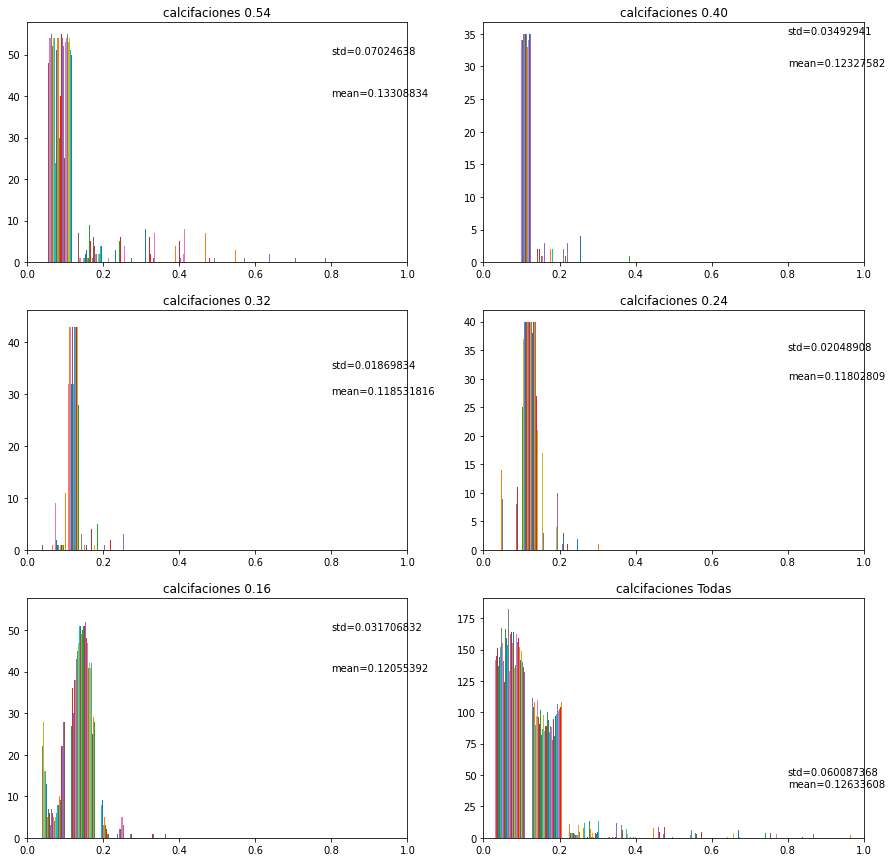

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

axs[0,0].hist(imagen_GATE_dosisCorregida[124:179,:])
axs[0,0].text(0.8, 50, 'std=' + str(imagen_GATE_dosisCorregida[124:179,:].std()))
axs[0,0].text(0.8, 40, 'mean=' + str(imagen_GATE_dosisCorregida[124:179,:].mean()))
axs[0,0].set_title('calcifaciones 0.54')
axs[0,0].set_xlim(0,1)

axs[0,1].hist(imagen_GATE_dosisCorregida[97:132,:])
axs[0,1].text(0.8, 35, 'std=' + str(imagen_GATE_dosisCorregida[97:132,:].std()))
axs[0,1].text(0.8, 30, 'mean=' + str(imagen_GATE_dosisCorregida[97:132,:].mean()))
axs[0,1].set_title('calcifaciones 0.40')
axs[0,1].set_xlim(0,1)

axs[1,0].hist(imagen_GATE_dosisCorregida[63:107,:])
axs[1,0].text(0.8, 35, 'std=' + str(imagen_GATE_dosisCorregida[63:107,:].std()))
axs[1,0].text(0.8, 30, 'mean=' + str(imagen_GATE_dosisCorregida[63:107,:].mean()))
axs[1,0].set_title('calcifaciones 0.32')
axs[1,0].set_xlim(0,1)

axs[1,1].hist(imagen_GATE_dosisCorregida[37:77,:])
axs[1,1].text(0.8, 35, 'std=' + str(imagen_GATE_dosisCorregida[37:77,:].std()))
axs[1,1].text(0.8, 30, 'mean=' + str(imagen_GATE_dosisCorregida[37:77,:].mean()))
axs[1,1].set_title('calcifaciones 0.24')
axs[1,1].set_xlim(0,1)

axs[2,0].hist(imagen_GATE_dosisCorregida[0:55,:])
axs[2,0].text(0.8, 50, 'std=' + str(imagen_GATE_dosisCorregida[0:55,:].std()))
axs[2,0].text(0.8, 40, 'mean=' + str(imagen_GATE_dosisCorregida[0:55,:].mean()))
axs[2,0].set_title('calcifaciones 0.16')
axs[2,0].set_xlim(0,1)

axs[2,1].hist(imagen_GATE_dosisCorregida)
axs[2,1].text(0.8, 50, 'std=' + str(imagen_GATE_dosisCorregida.std()))
axs[2,1].text(0.8, 40, 'mean=' + str(imagen_GATE_dosisCorregida.mean()))
axs[2,1].set_title('calcifaciones Todas')
axs[2,1].set_xlim(0,1)

plt.show()

0.39583012


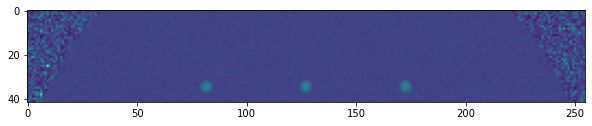

In [5]:
#Revisar los cortes
fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosisCorregida[38:80,:],cmap='viridis')
print(np.max(imagen_GATE_dosisCorregida[38:80,:]))


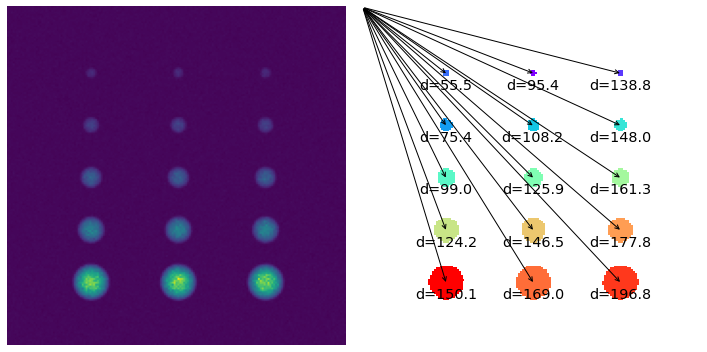

In [6]:
# use a boolean condition to find where pixel values are > 0.75
blobs = imagen_GATE_dosisCorregida[38:215, 38:215] > 0.15
# label connected regions that satisfy this condition
labels, nlabels = ndimage.label(blobs)
# find their centres of mass. in this case I'm weighting by the pixel values in
# `img`, but you could also pass the boolean values in `blobs` to compute the
# unweighted centroids.
r, c = np.vstack(ndimage.center_of_mass(imagen_GATE_dosisCorregida[38:215, 38:215], labels, np.arange(nlabels) + 1)).T
# find their distances from the top-left corner
d = np.sqrt(r*r + c*c)

# plot
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].imshow(imagen_GATE_dosisCorregida[38:215, 38:215])
ax[1].imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.rainbow)
for ri, ci, di in zip(r, c, d):
    ax[1].annotate('', xy=(0, 0), xytext=(ci, ri),
                   arrowprops={'arrowstyle':'<-', 'shrinkA':0})
    ax[1].annotate('d=%.1f' % di, xy=(ci, ri),  xytext=(0, -5),
                   textcoords='offset points', ha='center', va='top',
                   fontsize='x-large')
for aa in ax.flat:
    aa.set_axis_off()
fig.tight_layout()
plt.show()

In [33]:
print(r)
print(type(r))
print(r)
print(type(c))

[ 34.23173264  34.18075932  34.26815707  61.57793176  61.65634597
  61.62574494  88.96326869  89.01091084  88.97622543 116.31860459
 116.38327784 116.31539021 143.63044768 143.65341402 143.62931131]
<class 'numpy.ndarray'>
[ 34.23173264  34.18075932  34.26815707  61.57793176  61.65634597
  61.62574494  88.96326869  89.01091084  88.97622543 116.31860459
 116.38327784 116.31539021 143.63044768 143.65341402 143.62931131]
<class 'numpy.ndarray'>


177


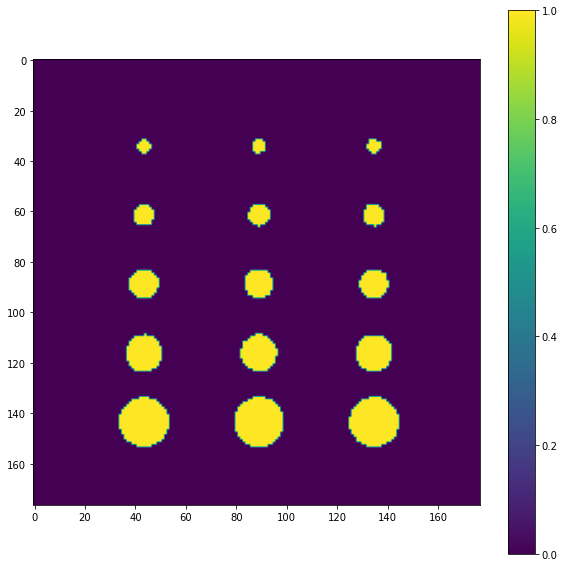

In [5]:
fig = plt.figure(figsize=(10,10))
imagen=imagen_GATE_dosisCorregida[38:215, 38:215]
plt.imshow(imagen>0.126,cmap='viridis')

indicesx,indicesy=(np.where(imagen_GATE_dosisCorregida[38:215, 38:215]>0.126))
#indicesz=(np.where(imagen_GATE_dosisCorregida[38:215, 38:215]>0.14))
np.savetxt('indicesx',indicesx)
np.savetxt('indicesy',indicesy)
#np.savetxt('indices',indicesz)


print(len(imagen[0,:]))
plt.colorbar()
np.set_printoptions()

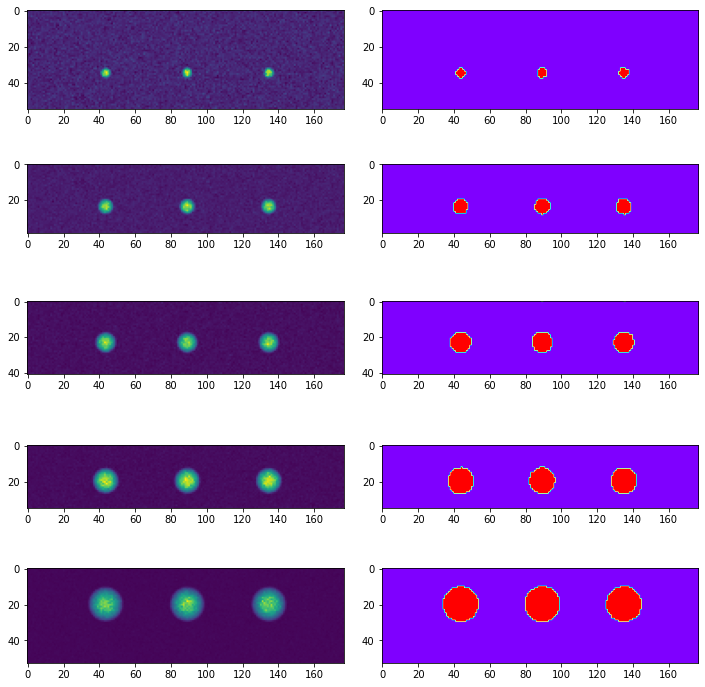

In [16]:
imagen=imagen_GATE_dosisCorregida[38:215, 38:215]
fig, ax = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(10, 10))
ax[0,0].imshow(imagen[0:55,:])
ax[0,1].imshow(imagen[0:55,:]>0.126, cmap=plt.cm.rainbow)

ax[1,0].imshow(imagen[38:77,:])
ax[1,1].imshow(imagen[38:77,:]>0.126, cmap=plt.cm.rainbow)

ax[2,0].imshow(imagen[66:107,:])
ax[2,1].imshow(imagen[66:107,:]>0.126, cmap=plt.cm.rainbow)

ax[3,0].imshow(imagen[97:132,:])
ax[3,1].imshow(imagen[97:132,:]>0.126, cmap=plt.cm.rainbow)

ax[4,0].imshow(imagen[124:179,:])
ax[4,1].imshow(imagen[124:179,:]>0.126, cmap=plt.cm.rainbow)


fig.tight_layout()
plt.savefig('Indices.png')
plt.show()

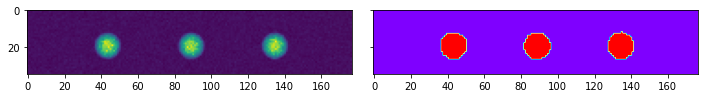

541     109.0
542     110.0
543     110.0
544     110.0
545     110.0
        ...  
1954    153.0
1955    153.0
1956    153.0
1957    153.0
1958    153.0
Name: y, Length: 1418, dtype: float64
[109 110 110 ... 153 153 153]
4.693588


In [239]:
imagen=imagen_GATE_dosisCorregida[38:215, 38:215]
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].imshow(imagen[97:132,:])
ax[1].imshow(imagen[97:132,:]>0.14, cmap=plt.cm.rainbow)
fig.tight_layout()
plt.show()


Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
Realindices = Realindices_x,Realindices_y
Realindices = np.array(Realindices).T
df = pd.DataFrame(Realindices, columns = ['y','x'])
df2 = df[df["y"] > 97]

print(df2['y'])
df2_x=df2['x'].to_numpy().astype(int)
df2_y=df2['y'].to_numpy().astype(int)
print(df2_y)


signal= imagen[df2_y,df2_x]
arr_all=imagen[97:132,:].flatten(order='C')
arr_signal=signal.flatten(order='C')       
arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_all.std(ddof=0)
print(CNR)

In [2]:
def sacar_CNRs1(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 55]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase100-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[0:55,:]
        
        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs2(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 77 ]
    df2 =df2[df2["y"] > 38 ]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
       
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase100-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[38:77,:]
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs3(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 107]
    df2 =df2[df2["y"] > 66 ]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase100-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[66:107,:]
        
        if (k==0):
            i_index,j_index=(np.where(region_of_interest>0.14))
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs4(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 132 ]
    df2 =df2[df2["y"] > 97 ]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase100-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[97:132,:]
        
        if (k==0):
            i_index,j_index=(np.where(region_of_interest>0.14))
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs5(voltajes):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df[df["y"] < 179 ]
    df2 =df2[df2["y"] > 124 ]
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase100-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[124:179,:]
        
        if (k==0):
            i_index,j_index=(np.where(region_of_interest>0.14))
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRsG(VoltajesCorre):
    CNRs=[]
    Realindices_x,Realindices_y= np.loadtxt('indicesx'),np.loadtxt('indicesy')
    Realindices = Realindices_x,Realindices_y
    Realindices = np.array(Realindices).T
    df = pd.DataFrame(Realindices, columns = ['y','x'])
    df2 = df
    df2_x=df2['x'].to_numpy().astype(int)
    df2_y=df2['y'].to_numpy().astype(int)
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase100-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw/ct_scans_Base
        ct_scan= ct_scan/np.max(ct_scan)
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[:,:]
        
                        
        signal= region[df2_y,df2_x]
        arr_all=region_of_interest.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

# CNR =$\frac{|S_{A}-S_{B}|}{\sigma_{o}}$

where $S_{A}$ and $S_{B}$ are signal intensities for signal producing structures A and B in the region of interest and $\sigma_{o}$ is the standard deviation of the background image noise.

In [3]:
VoltajesCorre= [16,18,20,22,24,26,28,30,35,40,45]
#print(len(VoltajesCorre))
CNR1s= sacar_CNRs1(VoltajesCorre)
CNR2s= sacar_CNRs2(VoltajesCorre)
CNR3s= sacar_CNRs3(VoltajesCorre)
CNR4s= sacar_CNRs4(VoltajesCorre)
CNR5s= sacar_CNRs5(VoltajesCorre)
CNRGene= sacar_CNRsG(VoltajesCorre)

In [6]:
CNRS0 = CNR1s, CNR2s, CNR3s, CNR4s, CNR5s
CNRS0  = np.array(CNRS0).T
df = pd.DataFrame(CNRS0, columns = ['CNR1s','CNR2s', 'CNR3s', 'CNR4s', 'CNR5s'])
display(df)
df.to_csv('CNRS100',index=False)

,CNR1s,CNR2s,CNR3s,CNR4s,CNR5s
0,9.363332,12.370556,14.593726,16.623241,19.325779
1,10.086997,14.163452,17.160929,19.585545,23.692707
2,9.704843,13.933836,17.314856,20.268610,25.145479
3,9.190458,13.190832,16.313540,19.689297,24.731798
4,8.264436,11.679967,15.094226,18.090736,22.949163
5,7.155854,10.677526,13.643704,16.655466,20.915451
6,6.507924,9.586249,12.293716,14.998779,19.335613
7,5.741191,8.650837,10.980220,13.315277,17.554018
8,4.395579,6.431915,8.461417,10.371475,13.786064
9,3.507114,5.246926,6.846467,8.344510,10.901402


In [8]:
VoltajesCorre= [16,18,20,22,24,26,28,30,35,40,45]
CNRGene= sacar_CNRsG(VoltajesCorre)
np.savetxt('CNRGene100',CNRGene)

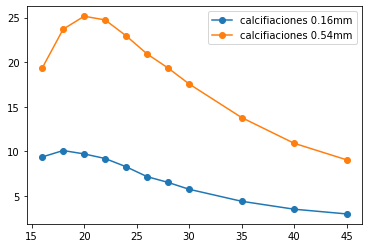

In [8]:
plt.plot(VoltajesCorre,CNR1s, 'o-', label='calcifiaciones 0.16mm')
plt.plot(VoltajesCorre,CNR5s, 'o-', label='calcifiaciones 0.54mm')
plt.legend()

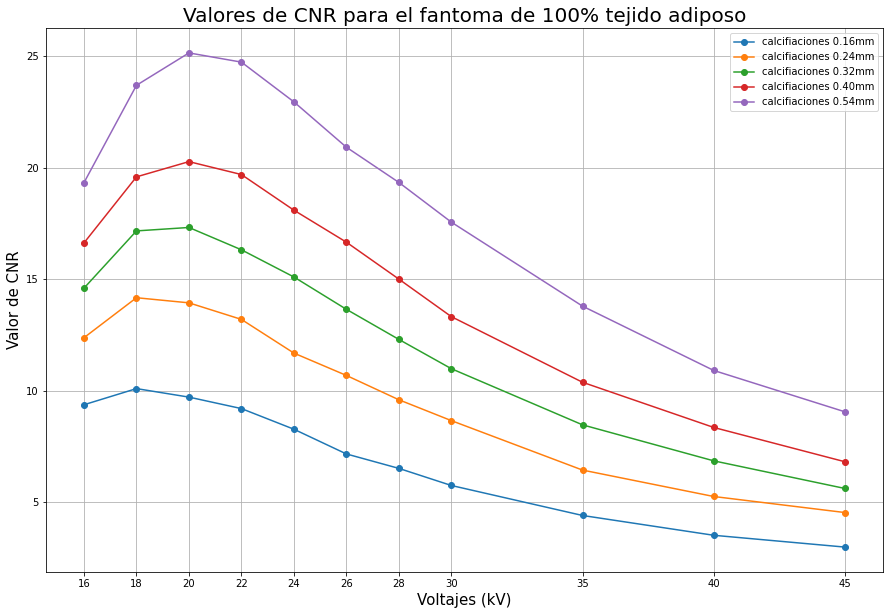

In [9]:
fig = plt.figure(figsize=(15,10))
plt.plot(VoltajesCorre,CNR1s, 'o-', label='calcifiaciones 0.16mm')
plt.plot(VoltajesCorre,CNR2s, 'o-', label='calcifiaciones 0.24mm')
plt.plot(VoltajesCorre,CNR3s, 'o-', label='calcifiaciones 0.32mm')
plt.plot(VoltajesCorre,CNR4s, 'o-', label='calcifiaciones 0.40mm')
plt.plot(VoltajesCorre,CNR5s, 'o-', label='calcifiaciones 0.54mm')
#plt.plot(VoltajesCorre,CNRGene,'*-', label='General')
plt.xlabel('Voltajes (kV)', fontsize= 15)
plt.ylabel('Valor de CNR', fontsize= 15)
plt.xticks(VoltajesCorre, VoltajesCorre )
#plt.yticks([0,3,4,5,6,7,10,11], [3,4,5,6,7,10,11])
plt.title('Valores de CNR para el fantoma de 100% tejido adiposo', fontsize= 20)
plt.grid()
plt.legend()
plt.savefig('CNRs100.png')

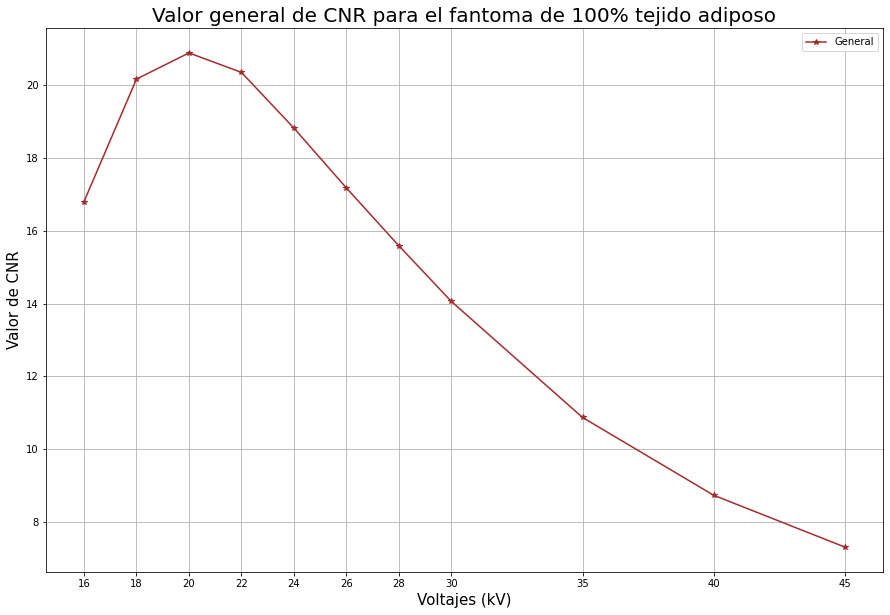

In [10]:
fig = plt.figure(figsize=(15,10))
plt.plot(VoltajesCorre,CNRGene,'*-', color='brown', label='General')
plt.xlabel('Voltajes (kV)', fontsize= 15)
plt.ylabel('Valor de CNR', fontsize= 15)
plt.xticks(VoltajesCorre, VoltajesCorre )
#plt.yticks([0,3,4,5,6,7,10,11], [3,4,5,6,7,10,11])
plt.title('Valor general de CNR para el fantoma de 100% tejido adiposo', fontsize= 20)
plt.grid()
plt.legend()
plt.savefig('CNRGeneral100.png')

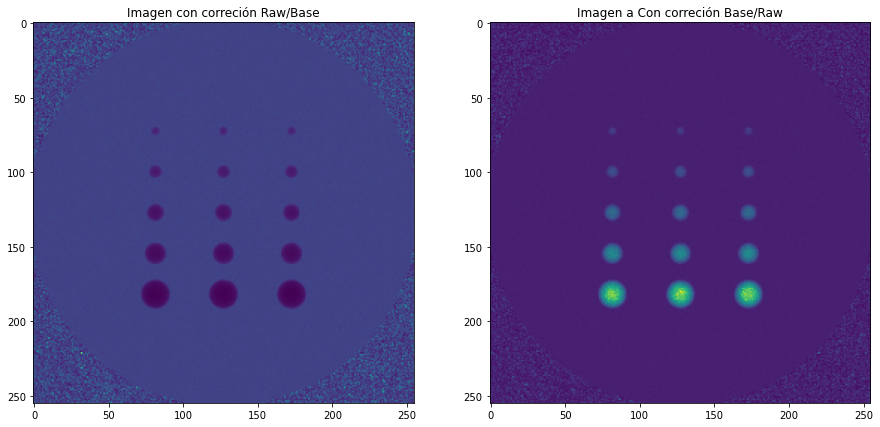

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-0-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis = ct_scans[0]
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase100-0-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0]



imagen_GATE_dosisCorregida= imagen_GATE_dosis/imagen_GATE_dosisBase



#ct_scans2 = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile100-10-Dose.mhd', sitk.sitkFloat32))
#imagen_GATE_dosis2 = ct_scans2[0]
imagen_GATE_dosisCorregida2= imagen_GATE_dosisBase/imagen_GATE_dosis


ax[0].imshow(imagen_GATE_dosisCorregida,cmap='viridis')
ax[0].title.set_text('Imagen con correción Raw/Base')
ax[1].imshow(imagen_GATE_dosisCorregida2,cmap='viridis')
ax[1].title.set_text('Imagen a Con correción Base/Raw')
plt.savefig('comparación.png')